In [47]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, loaded_best_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [48]:
from tensorflow.keras import datasets, models, layers

In [49]:
# cifar-10
(train_images, train_labels), (test_images, test_lables) = datasets.cifar10.load_data()
train_images.shape, train_labels

((50000, 32, 32, 3), array([[6],
        [9],
        [9],
        ...,
        [9],
        [1],
        [1]], dtype=uint8))

In [50]:
train_images

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [51]:
# normalization 
train_images = train_images / 255
test_images = test_images / 255

In [52]:
train_images

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [53]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

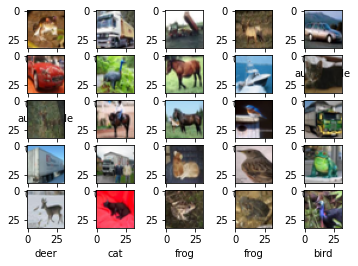

In [54]:
#plt.figure
for i  in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])

CNN model


In [55]:
#cnn model
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

In [56]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

#number of class = 10 in the dataset
model.add(layers.Dense(10))

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1152)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [58]:
from tensorflow.python import metrics
from re import L
#compile

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [59]:
#Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [60]:
#early stopping
es = EarlyStopping(monitor='accuracy',
                   mode='max',
                   patience=2,
                   verbose=1)

mc = ModelCheckpoint('best_model.h5',
                     monitor='accuracy',
                     mode='max',
                     verbose=1,
                     save_best_only=True)

In [95]:
#train
history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=62,
                    validation_split=0.2,
                    callbacks=[es, mc])
                    # validation_data=(test_images,test_lables))

Epoch 1/10
643/646 [============================>.] - ETA: 0s - loss: 0.1901 - accuracy: 0.9327
Epoch 1: accuracy improved from 0.92705 to 0.93275, saving model to best_model.h5
646/646 [==============================] - 3s 5ms/step - loss: 0.1901 - accuracy: 0.9327 - val_loss: 2.0557 - val_accuracy: 0.6501
Epoch 2/10
644/646 [============================>.] - ETA: 0s - loss: 0.1906 - accuracy: 0.9328
Epoch 2: accuracy improved from 0.93275 to 0.93292, saving model to best_model.h5
646/646 [==============================] - 3s 5ms/step - loss: 0.1905 - accuracy: 0.9329 - val_loss: 2.1560 - val_accuracy: 0.6451
Epoch 3/10
637/646 [============================>.] - ETA: 0s - loss: 0.1884 - accuracy: 0.9333
Epoch 3: accuracy improved from 0.93292 to 0.93310, saving model to best_model.h5
646/646 [==============================] - 3s 5ms/step - loss: 0.1890 - accuracy: 0.9331 - val_loss: 2.1213 - val_accuracy: 0.6493
Epoch 4/10
636/646 [============================>.] - ETA: 0s - loss: 0.1

In [96]:

type(history)

keras.callbacks.History

In [97]:
test_loss, test_accuracy = model.evaluate(test_images, test_lables)
test_loss, test_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 2.5086 - accuracy: 0.6411


(2.5086209774017334, 0.6410999894142151)

In [98]:
history.history

{'loss': [0.19005346298217773,
  0.19048528373241425,
  0.18900790810585022,
  0.18113259971141815,
  0.17965728044509888,
  0.17252109944820404,
  0.1626756191253662,
  0.1662769466638565,
  0.15499749779701233,
  0.1401117742061615],
 'accuracy': [0.9327499866485596,
  0.9329249858856201,
  0.9330999851226807,
  0.9366250038146973,
  0.9361749887466431,
  0.937749981880188,
  0.9428250193595886,
  0.9403499960899353,
  0.9458749890327454,
  0.9515249729156494],
 'val_loss': [2.0557031631469727,
  2.1560375690460205,
  2.1212785243988037,
  2.1398751735687256,
  2.2536723613739014,
  2.27846097946167,
  2.3090624809265137,
  2.3346195220947266,
  2.3917112350463867,
  2.4830880165100098],
 'val_accuracy': [0.6500999927520752,
  0.6450999975204468,
  0.6492999792098999,
  0.6524999737739563,
  0.6471999883651733,
  0.6509000062942505,
  0.6503999829292297,
  0.6513000130653381,
  0.6496999859809875,
  0.6486999988555908]}

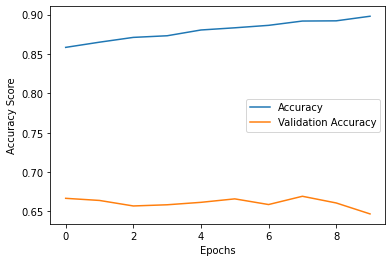

In [89]:
#result visualization
plt.plot(history_1.history['accuracy'], label='Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Score')
plt.legend()